# Praktikum Data Mining 2 RKA
## Muhammad Farhan Arya Wicaksono
### 5054231011

In [1]:
# Import Library

import os
import pandas as pd
from xgboost import XGBRegressor


DATA_DIR = "data"
SUBMISSION_DIR = "submission"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_PATH = os.path.join(DATA_DIR, "test.csv")
SUBMISSION_PATH = os.path.join(DATA_DIR, "sample_submission.csv")
TARGET = "Salary_Changes"

"""
Change filename up to your preference
"""
SUBMISSION_NAME = "submission_1.csv" 
SUBMISSION_FILE = os.path.join(SUBMISSION_DIR, SUBMISSION_NAME)

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from category_encoders import TargetEncoder

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Load data

In [4]:
data = pd.read_csv(TRAIN_PATH)
data.shape

(8000, 15)

In [5]:
data.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,8.605141,4.759242,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,8.487654,5.785164,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,7.782498,5.067122,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,6.691559,2.132398,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,9.573909,3.102280,0,Medium,0,0,1,0,1,0,1,Healthcare,1


# EDA

In [6]:
# info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           8000 non-null   int64  
 1   Work_From_Home                 8000 non-null   int64  
 2   Hours_Worked_Per_Day           8000 non-null   float64
 3   Meetings_Per_Day               8000 non-null   float64
 4   Productivity_Change            8000 non-null   int64  
 5   Stress_Level                   8000 non-null   object 
 6   Health_Issue                   8000 non-null   int64  
 7   Job_Security                   8000 non-null   int64  
 8   Childcare_Responsibilities     8000 non-null   int64  
 9   Commuting_Changes              8000 non-null   int64  
 10  Technology_Adaptation          8000 non-null   int64  
 11  Salary_Changes                 8000 non-null   int64  
 12  Team_Collaboration_Challenges  8000 non-null   i

In [7]:
#check null
data.isnull().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
Affected_by_Covid                0
dtype: int64

In [8]:
# check duplicated
data.duplicated().sum()

0

In [9]:
# target var, imbalanced
data.value_counts(TARGET)

Salary_Changes
0    6447
1    1553
Name: count, dtype: int64

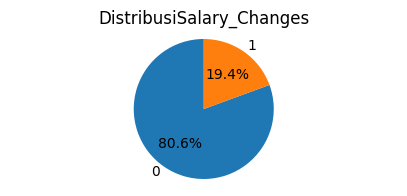

In [10]:
data_target = data[TARGET].value_counts()  
plt.figure(figsize=(5, 2))
plt.pie(data_target, autopct='%1.1f%%', startangle=90, labels=data_target.index)
plt.title(f'Distribusi{TARGET}' )
plt.axis('equal')
plt.show()

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Increased_Work_Hours,8000.0,0.676250,0.467935,0.000000,0.000000,1.000000,1.000000,1.000000
Work_From_Home,8000.0,0.800500,0.399649,0.000000,1.000000,1.000000,1.000000,1.000000
Hours_Worked_Per_Day,8000.0,8.007515,1.985586,0.287249,6.635848,8.008212,9.364298,16.958169
Meetings_Per_Day,8000.0,3.970506,1.519338,-2.698406,2.922402,3.968731,5.018802,9.537437
Productivity_Change,8000.0,0.505750,0.499998,0.000000,0.000000,1.000000,1.000000,1.000000
Health_Issue,8000.0,0.301125,0.458776,0.000000,0.000000,0.000000,1.000000,1.000000
Job_Security,8000.0,0.400750,0.490081,0.000000,0.000000,0.000000,1.000000,1.000000
Childcare_Responsibilities,8000.0,0.397625,0.489438,0.000000,0.000000,0.000000,1.000000,1.000000
Commuting_Changes,8000.0,0.503750,0.500017,0.000000,0.000000,1.000000,1.000000,1.000000
Technology_Adaptation,8000.0,0.605750,0.488720,0.000000,0.000000,1.000000,1.000000,1.000000


In [12]:
data[data['Meetings_Per_Day'] < 0]

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
142,1,0,5.885967,-0.120848,1,Medium,1,0,0,0,1,0,0,Retail,1
797,1,1,9.284801,-0.390590,0,Low,1,0,0,0,1,1,1,Healthcare,1
1083,1,1,7.105579,-0.192276,0,High,0,0,1,1,1,0,1,Healthcare,1
1935,1,1,9.288512,-0.625197,0,High,1,1,1,0,1,0,0,Healthcare,1
1992,1,1,6.002369,-0.805018,0,Medium,1,1,0,1,1,1,1,IT,1
2153,1,1,8.489341,-0.001638,1,Medium,1,1,0,0,0,1,1,Education,1
2188,1,1,8.336518,-0.621714,1,Low,0,1,1,1,1,0,0,Healthcare,1
2973,1,1,13.194874,-0.514012,0,High,0,0,0,1,1,0,1,Healthcare,1
3082,1,1,12.165620,-0.435548,1,Medium,0,1,0,0,1,1,0,Education,1
3572,1,1,8.973873,-0.036800,0,Medium,0,0,0,0,1,0,1,Retail,1


In [13]:
len(data[data['Meetings_Per_Day'] < 0])

39

In [14]:
data[data['Meetings_Per_Day'] < 0].value_counts('Affected_by_Covid')

Affected_by_Covid
1    39
Name: count, dtype: int64

In [15]:
# ganti 0
false_met = data[data['Meetings_Per_Day'] < 0].index
data.iloc[false_met]['Affected_by_Covid'] = 0

In [16]:
data.nunique()

Increased_Work_Hours                2
Work_From_Home                      2
Hours_Worked_Per_Day             8000
Meetings_Per_Day                 8000
Productivity_Change                 2
Stress_Level                        3
Health_Issue                        2
Job_Security                        2
Childcare_Responsibilities          2
Commuting_Changes                   2
Technology_Adaptation               2
Salary_Changes                      2
Team_Collaboration_Challenges       2
Sector                              4
Affected_by_Covid                   1
dtype: int64

In [17]:
numerical_col = data.select_dtypes('number').columns
categorical_col = data.select_dtypes(exclude='number').columns

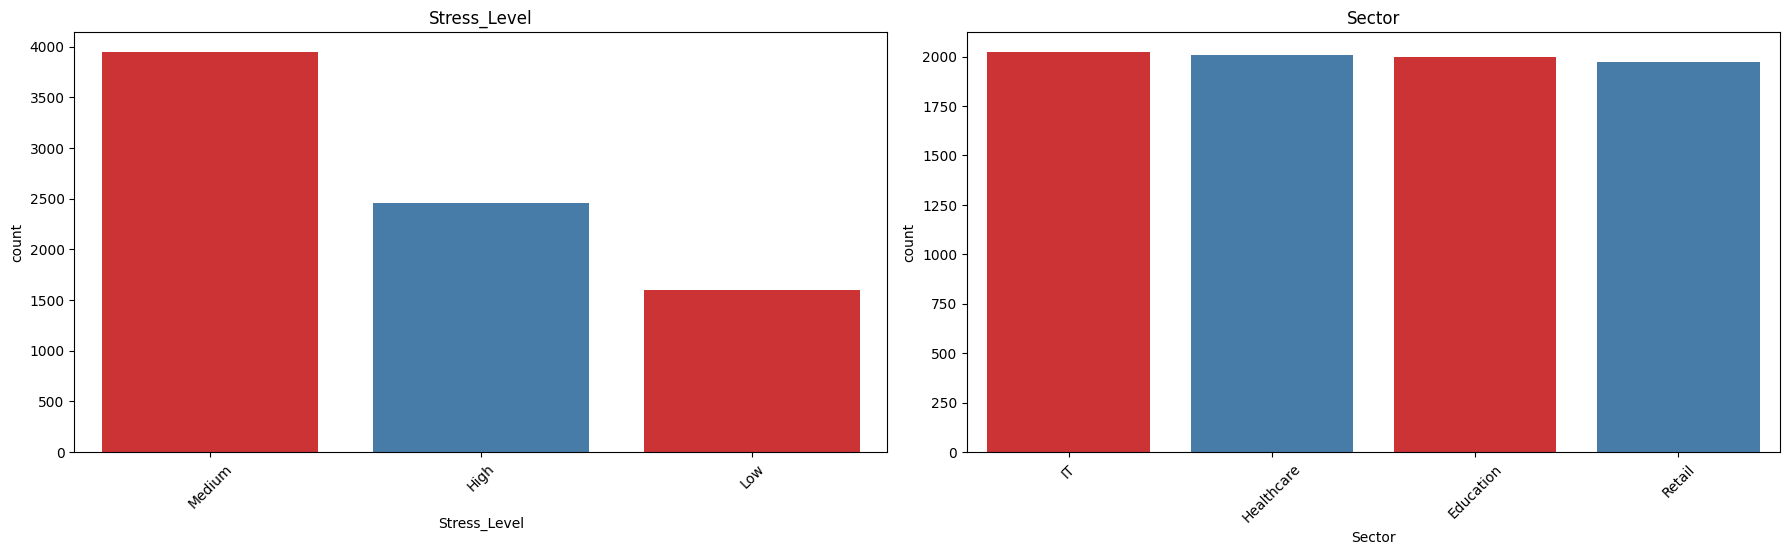

In [18]:
color_palette = sns.color_palette("Set1", len(categorical_col))

n_cols = 2
n_rows = (len(categorical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data[column].value_counts().nlargest(11).index
    
    filtered_data = data[data[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

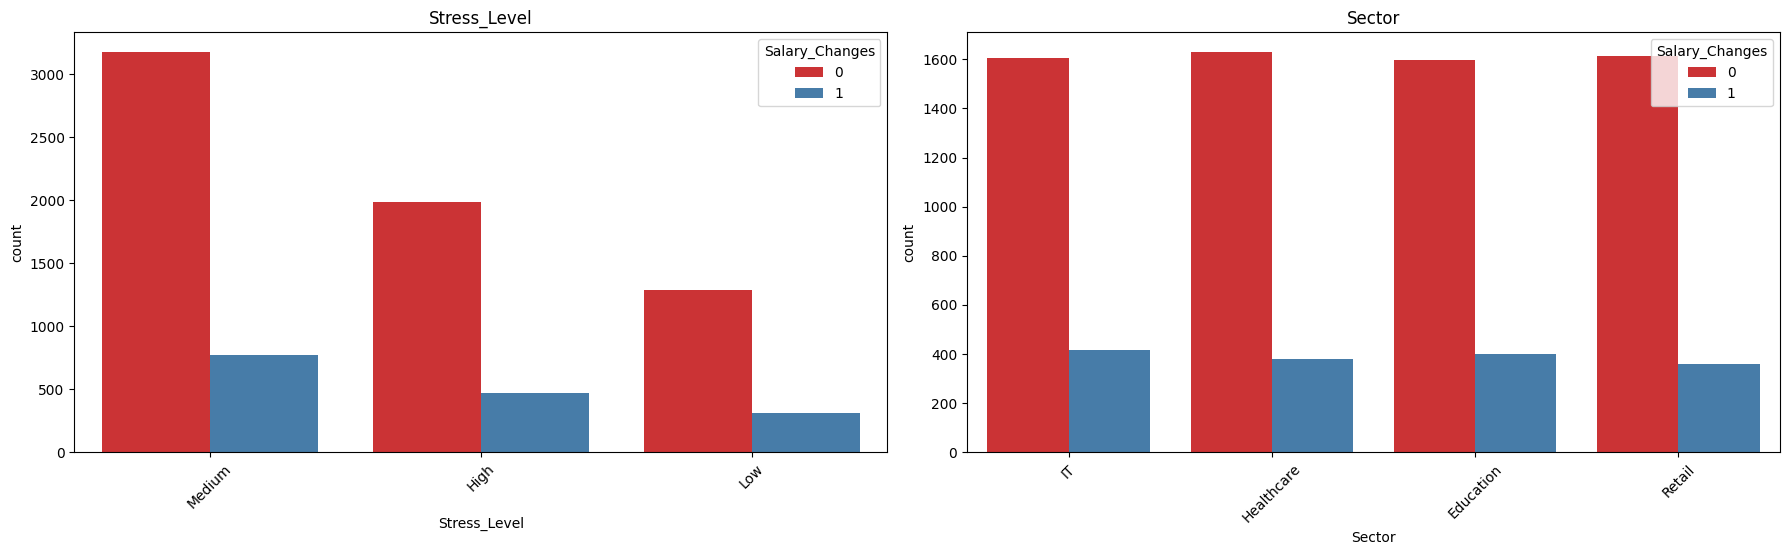

In [19]:
color_palette = sns.color_palette("Set1", len(categorical_col))

n_cols = 2
n_rows = (len(categorical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data[column].value_counts().nlargest(11).index
    
    filtered_data = data[data[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data, x=column, palette=color_palette, order=top_10_items, hue=TARGET)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()

numericl col

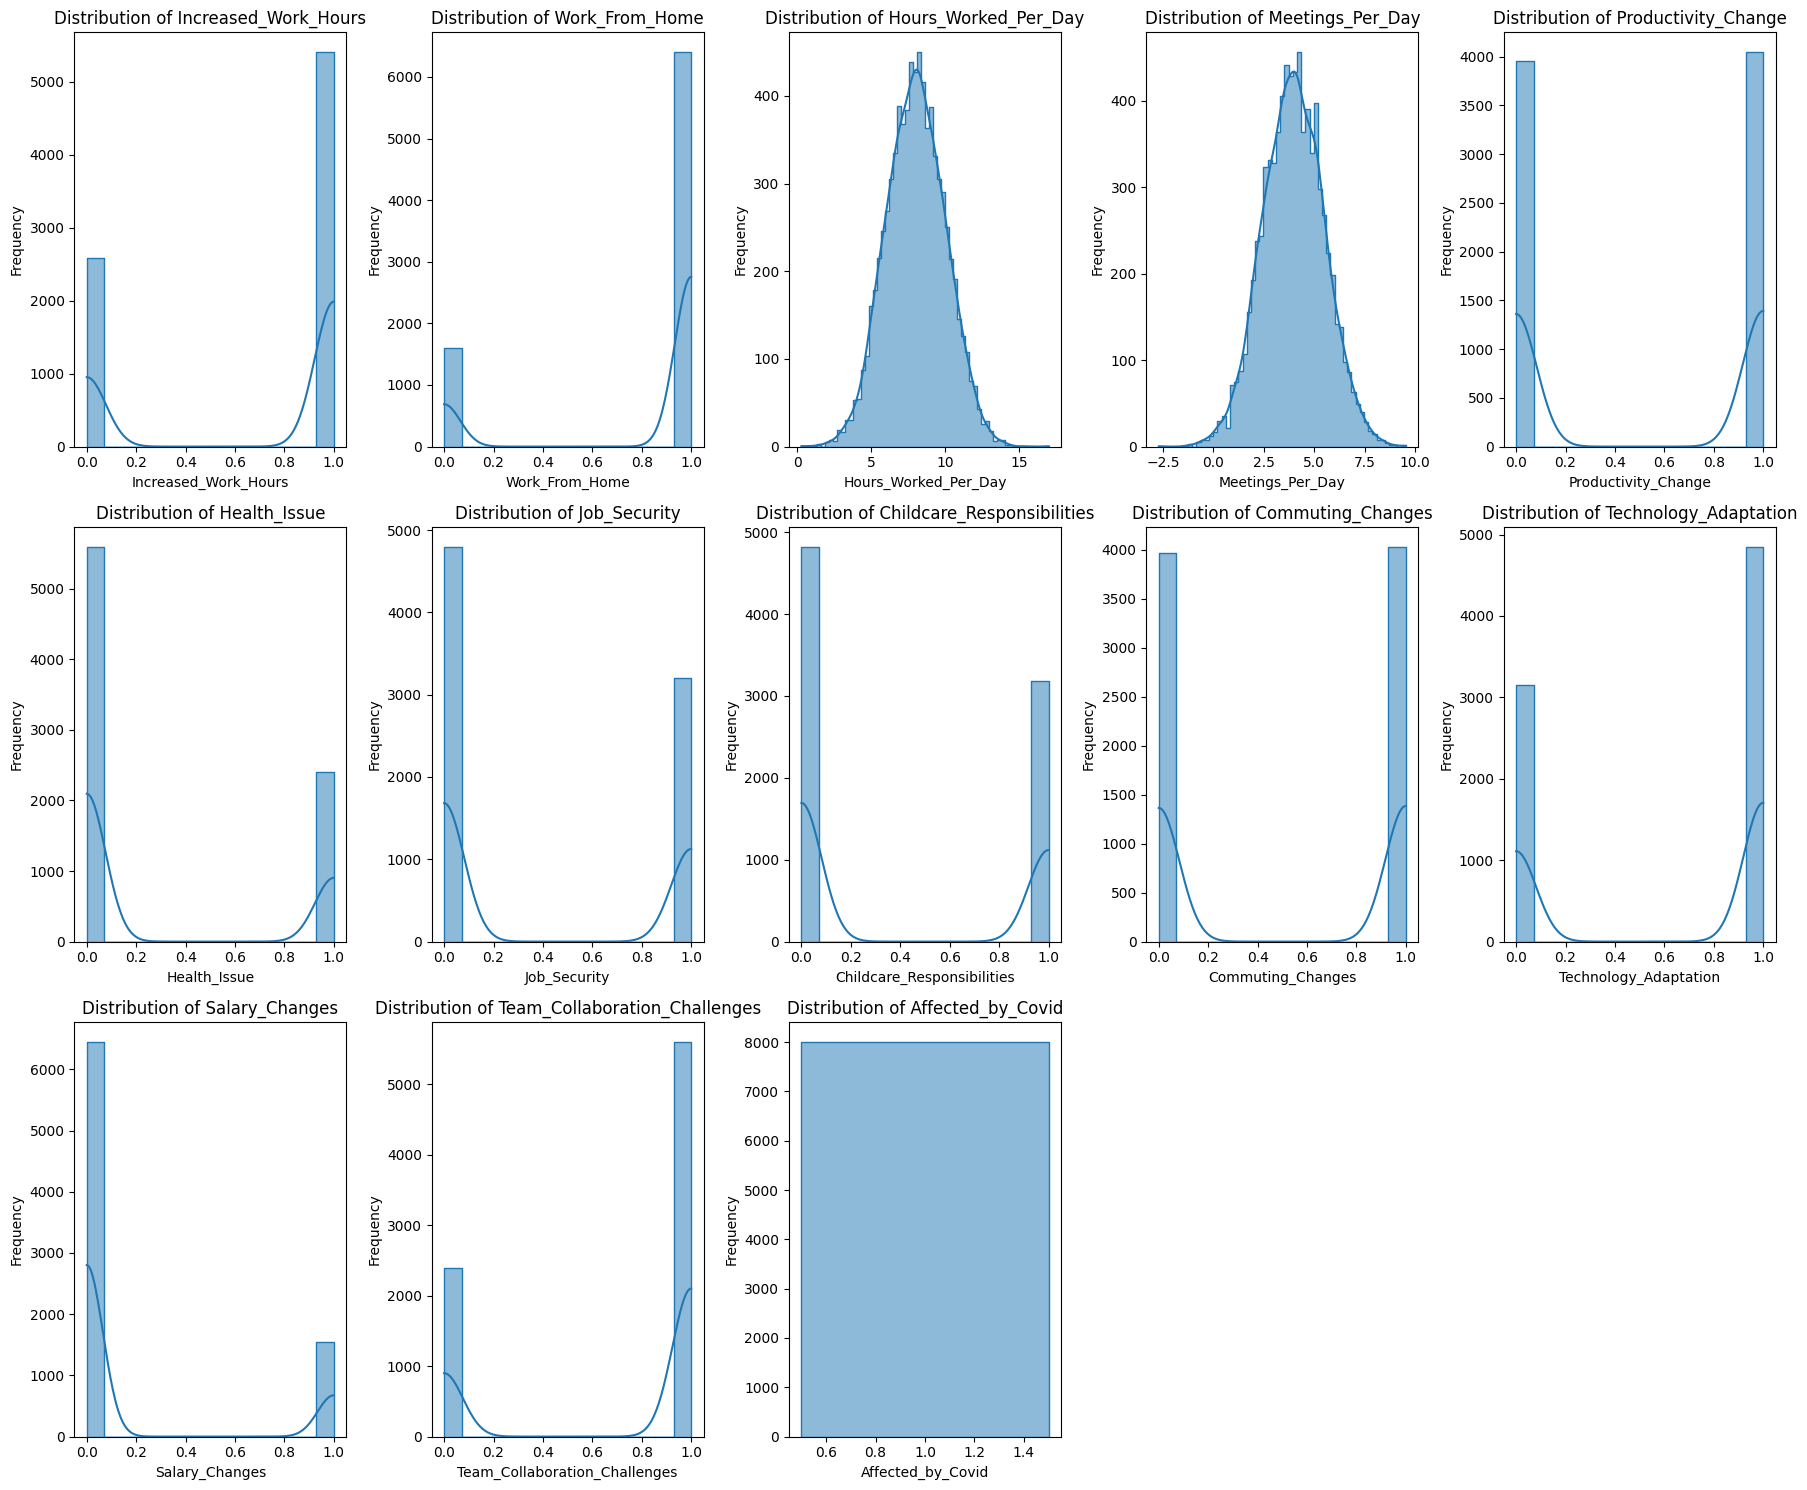

In [20]:
n_cols = 5
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=data, x=column, kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

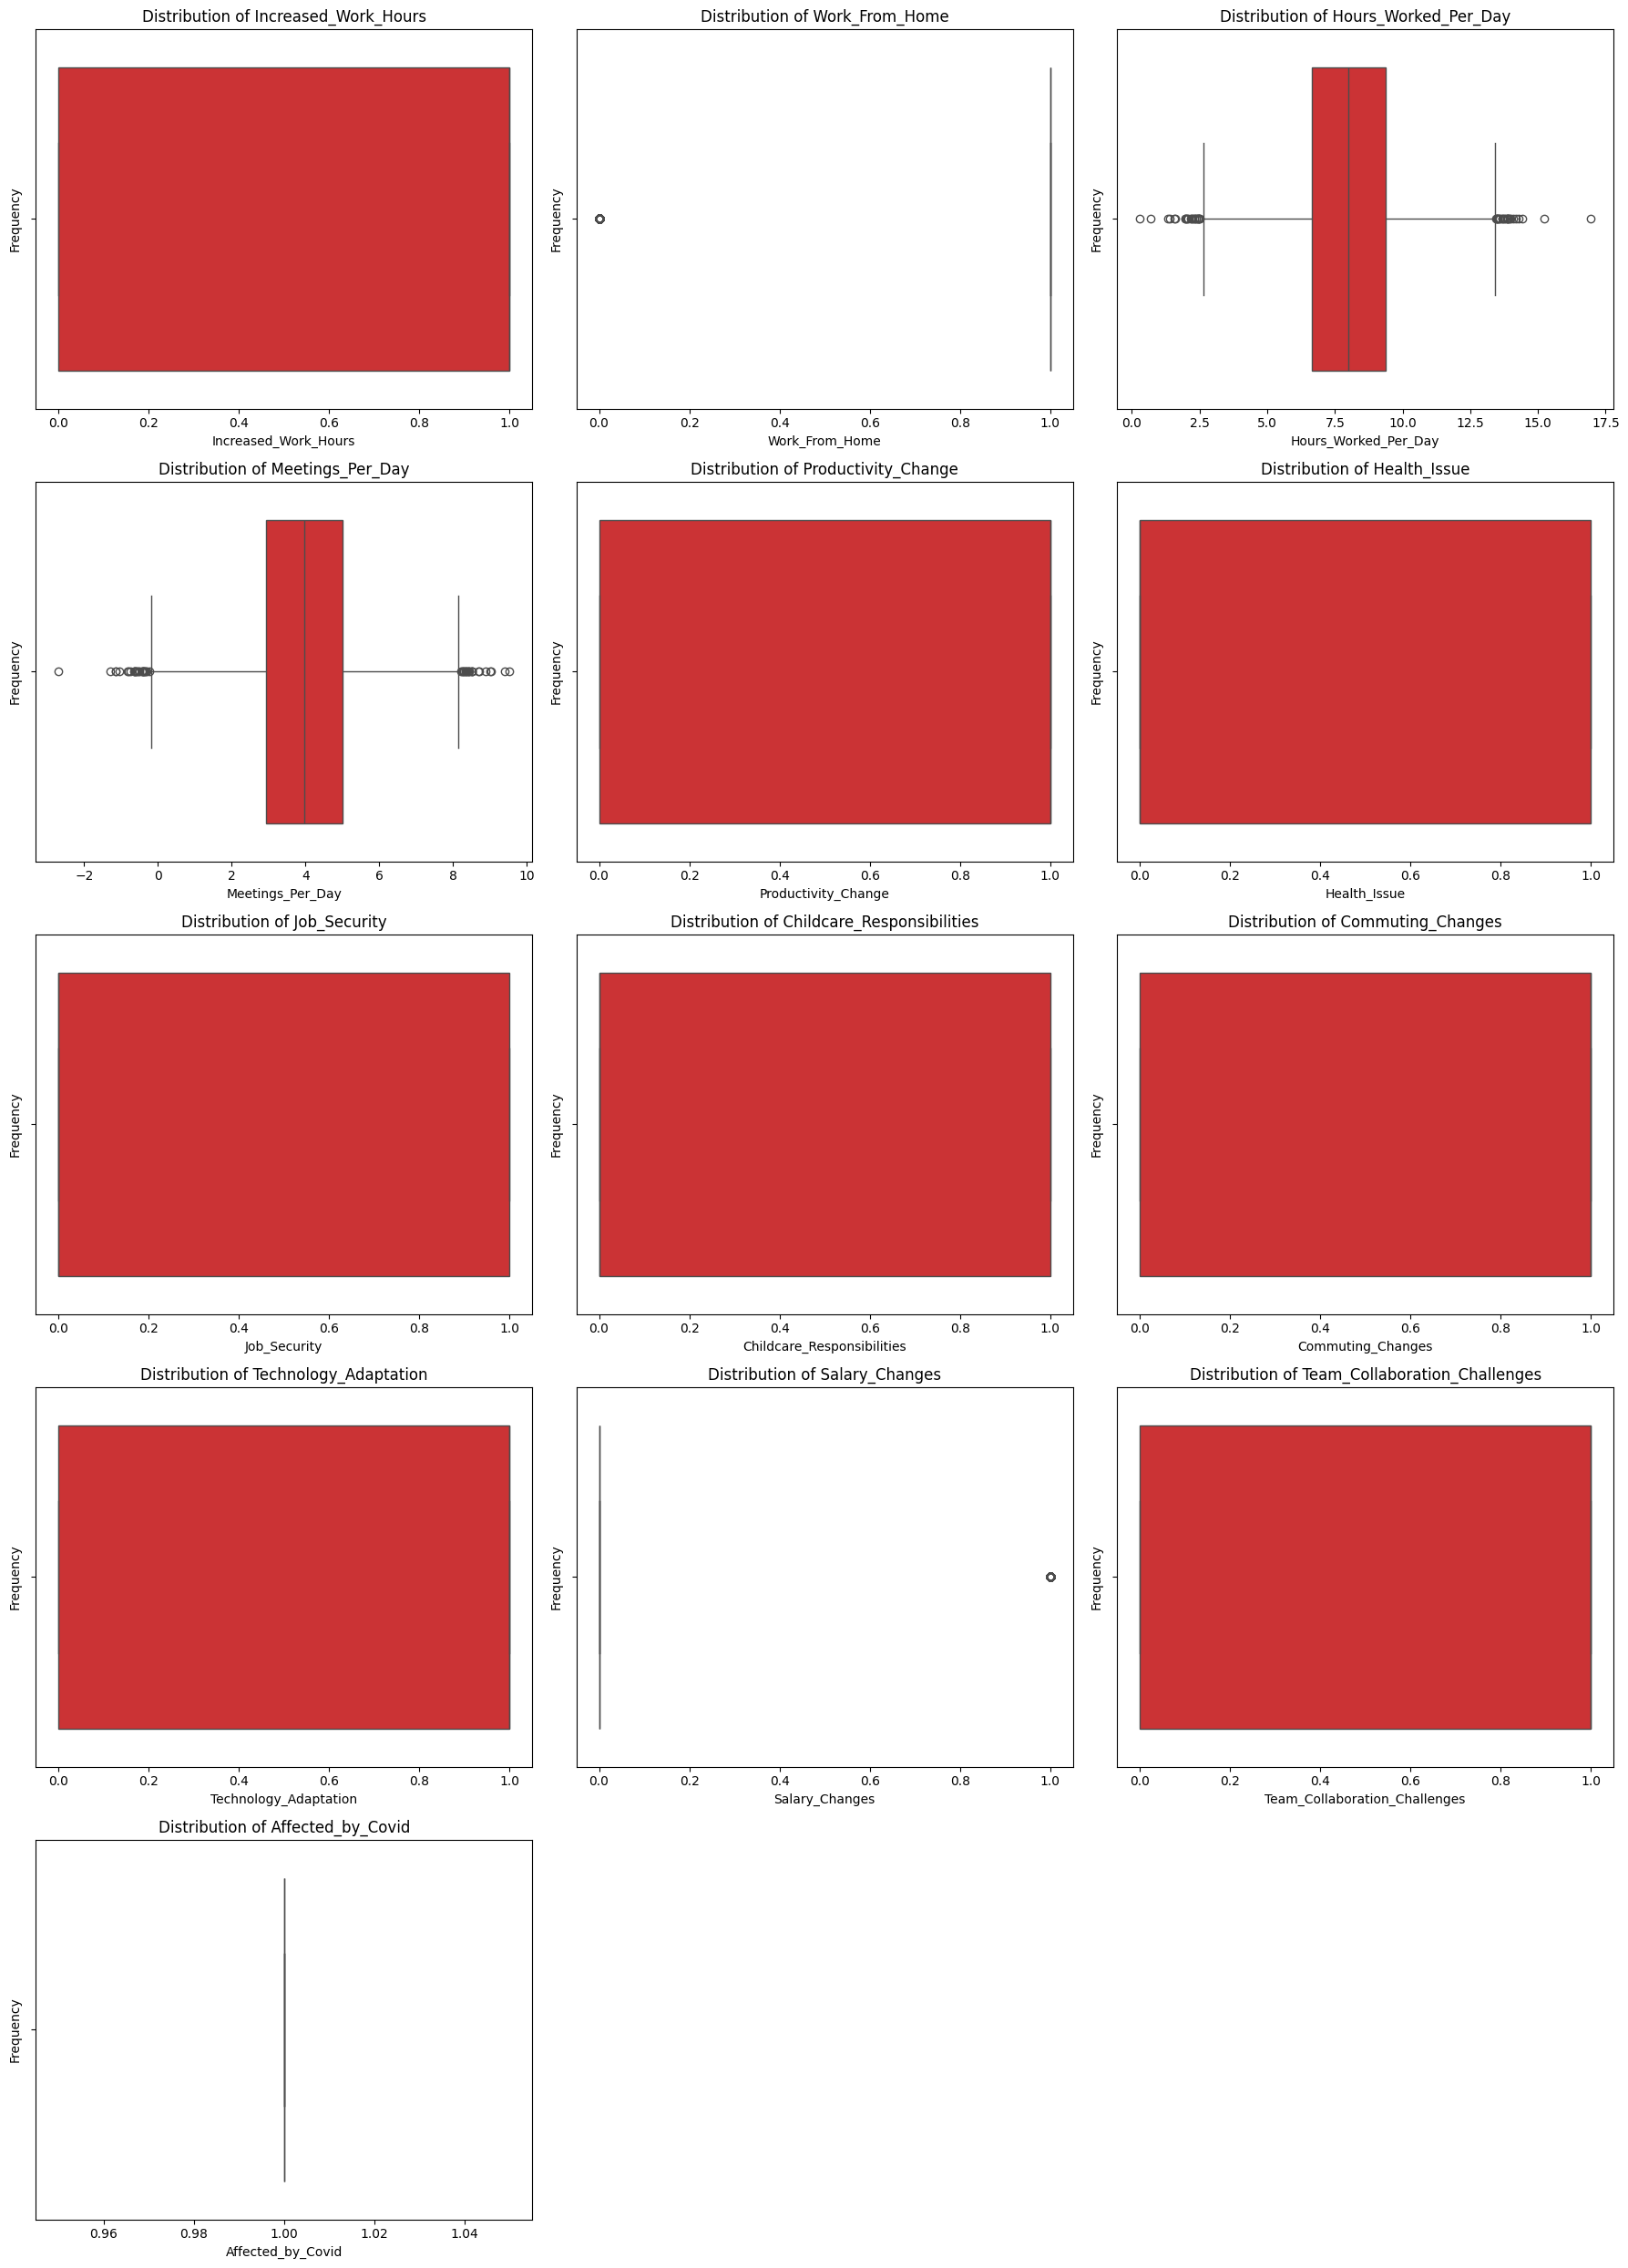

In [21]:
n_cols = 3
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.boxplot(data=data, x=column, palette='Set1')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

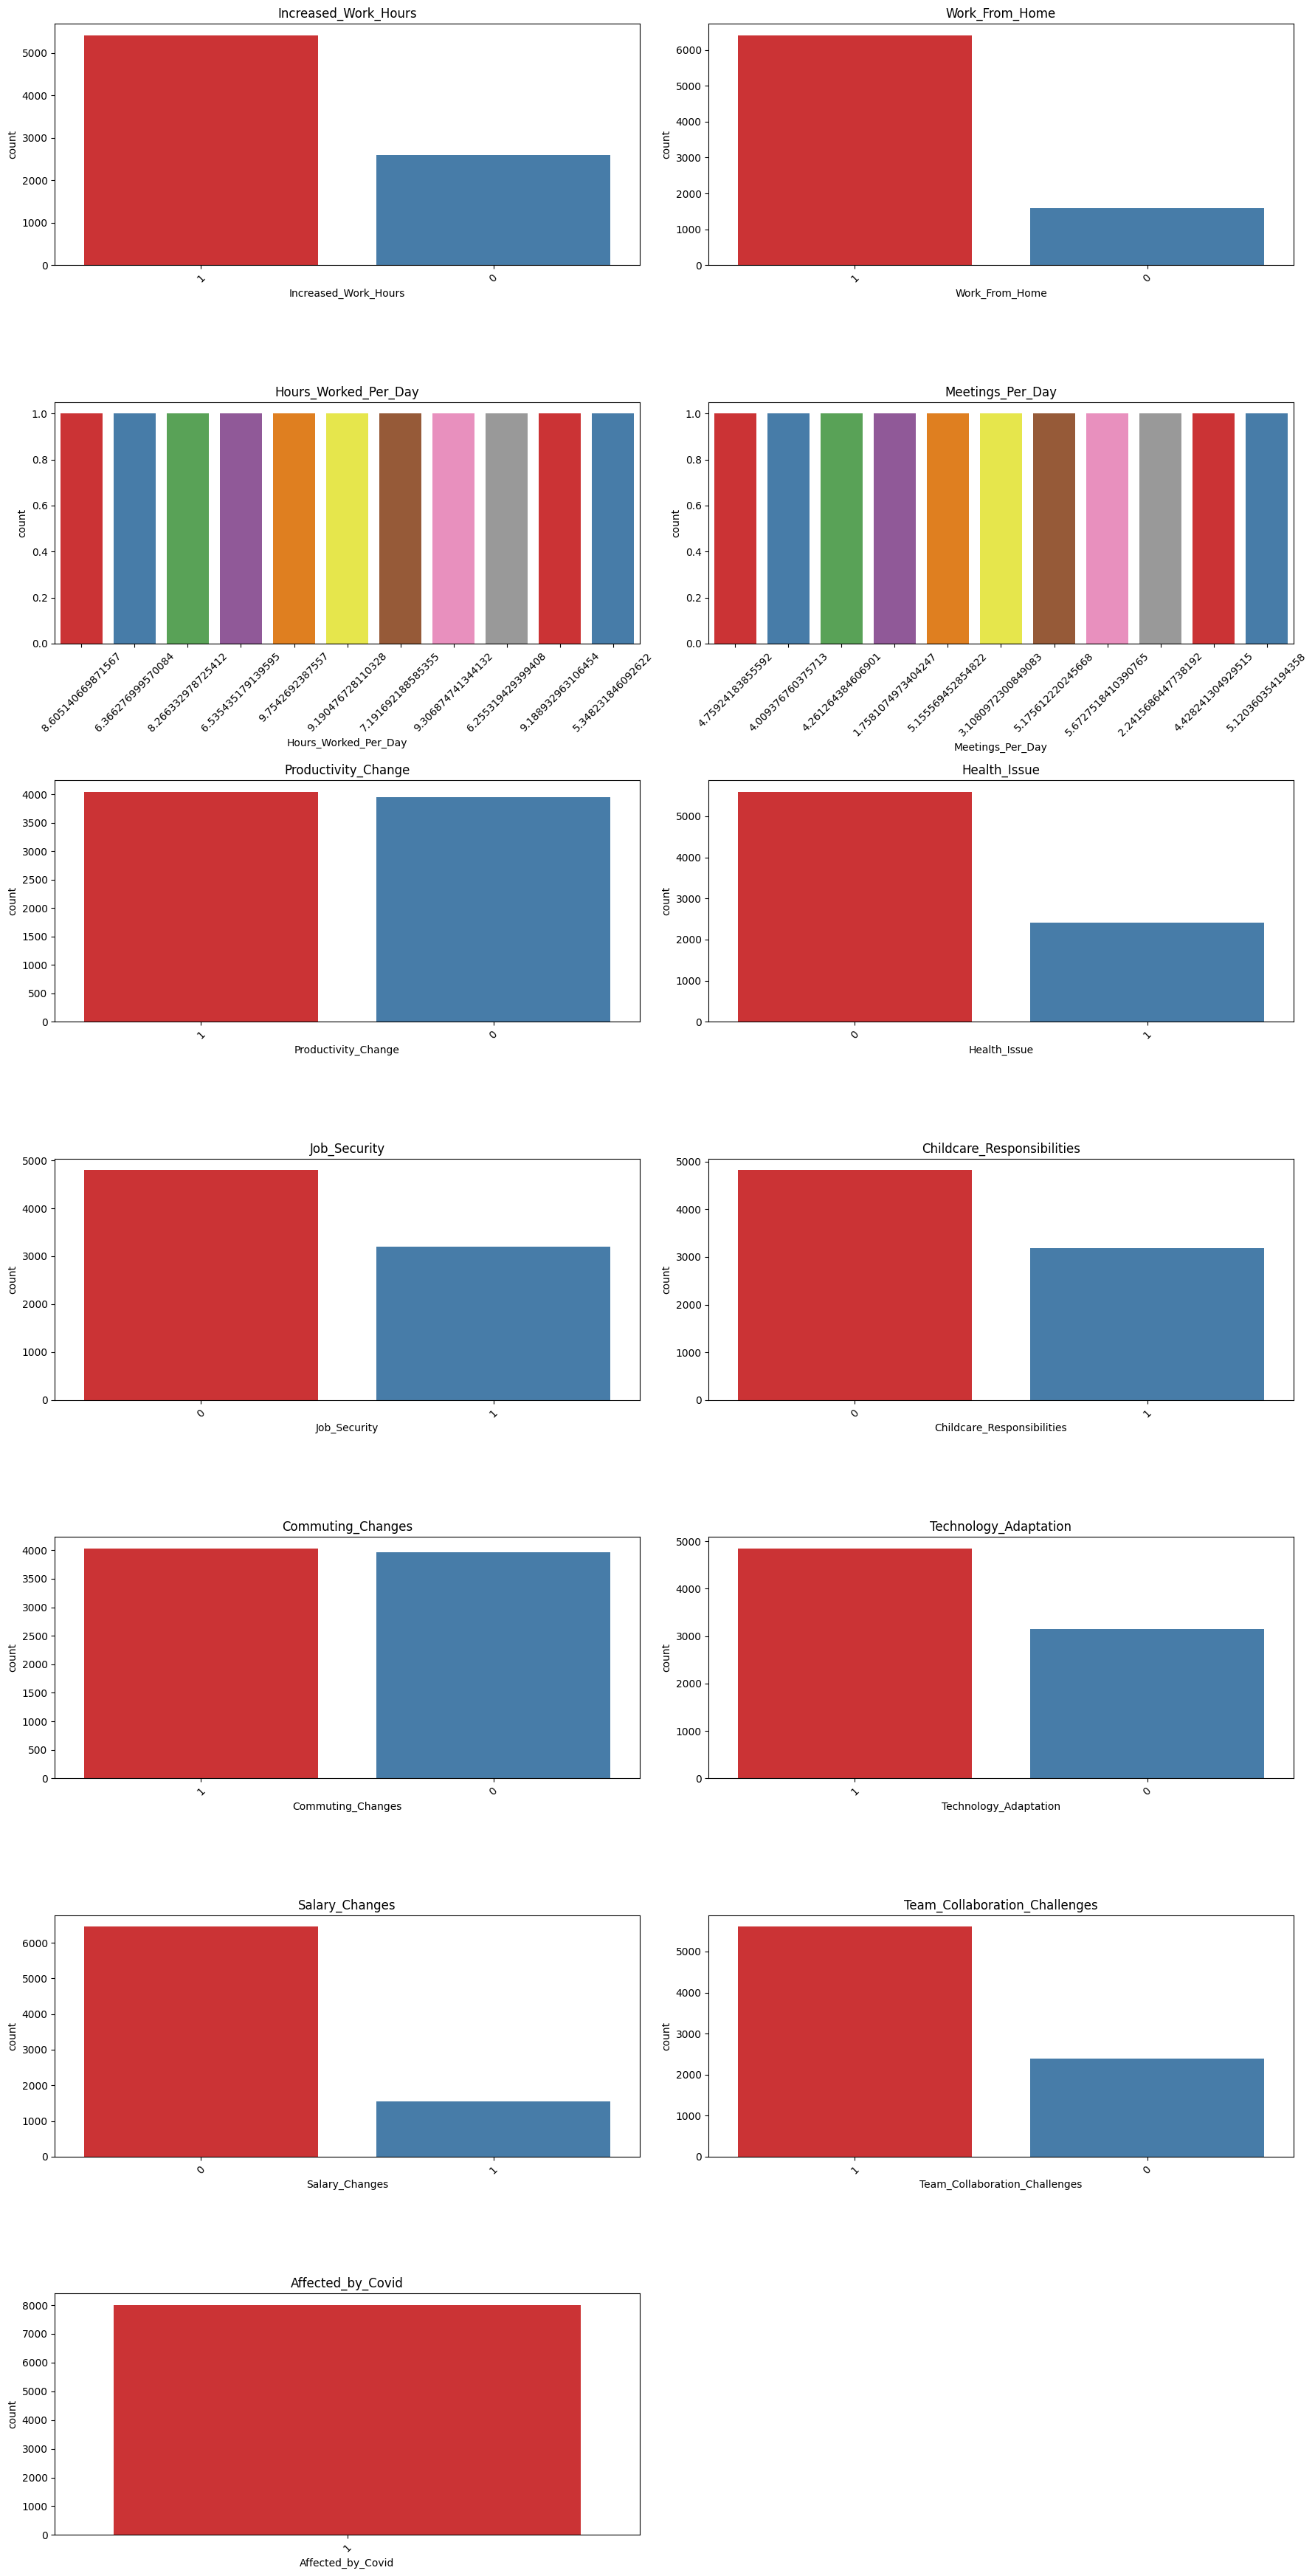

In [22]:
color_palette = sns.color_palette("Set1", len(numerical_col))

n_cols = 2
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data[column].value_counts().nlargest(11).index
    
    filtered_data = data[data[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()

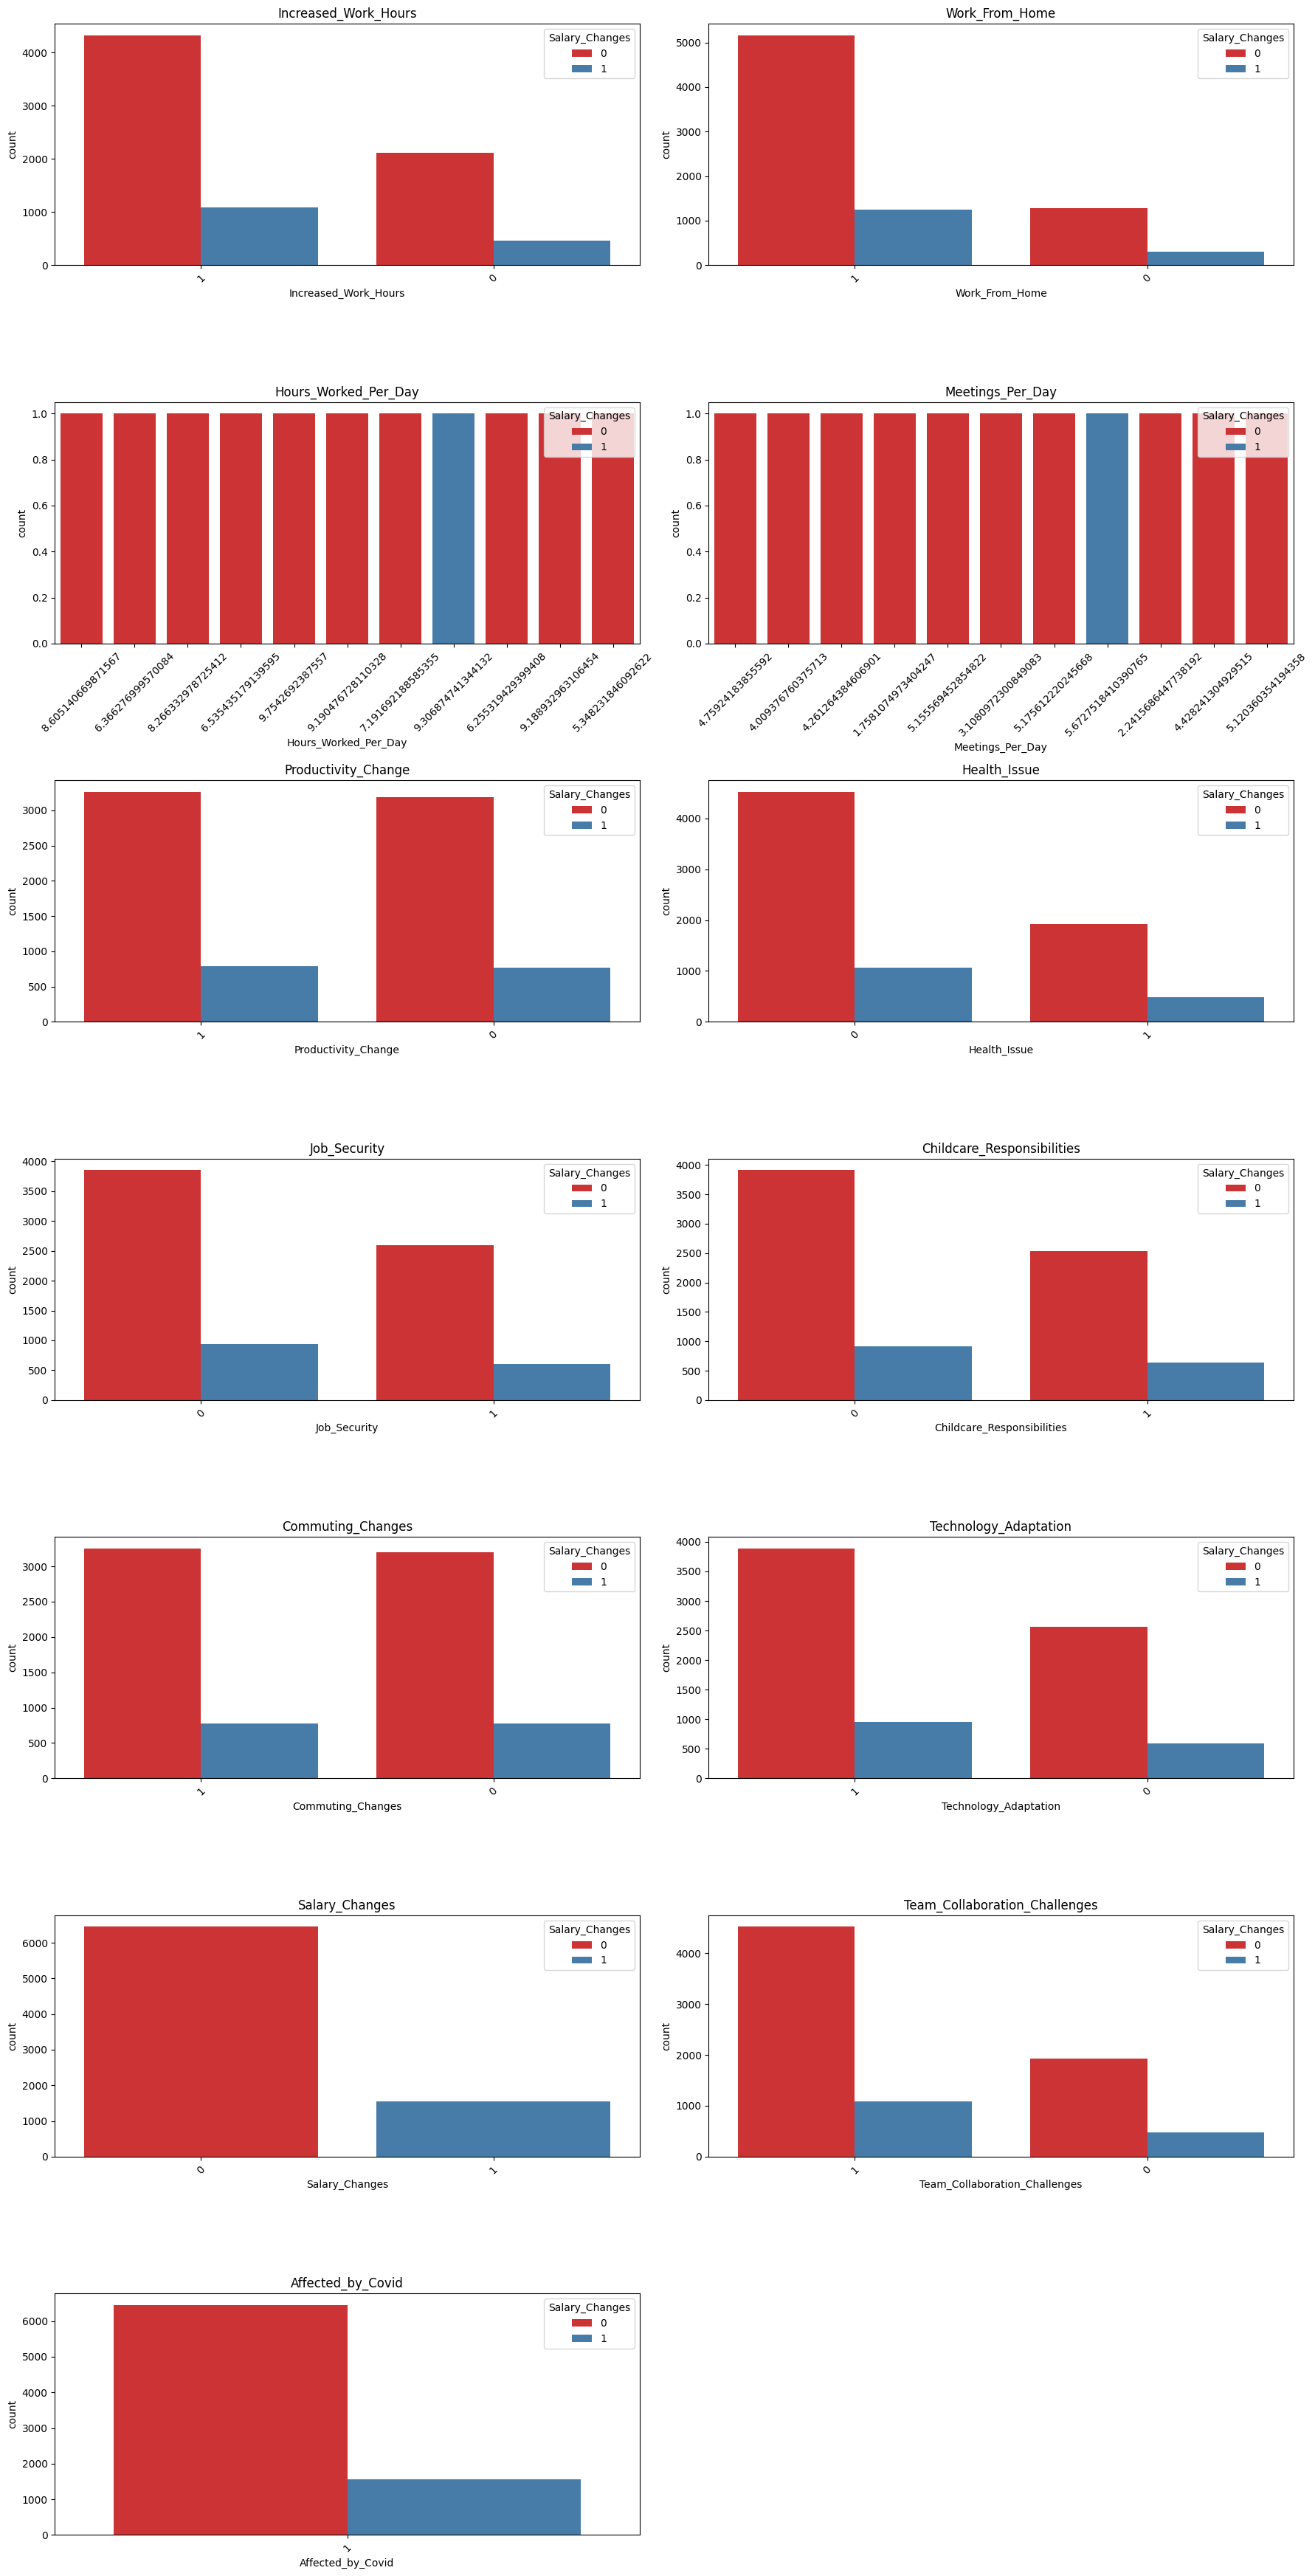

In [23]:
color_palette = sns.color_palette("Set1", len(numerical_col))

n_cols = 2
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data[column].value_counts().nlargest(11).index
    
    filtered_data = data[data[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data, x=column, palette=color_palette, order=top_10_items, hue=TARGET)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()

In [24]:
data_class1 = data[data['Salary_Changes'] == 1]
data_class0 = data[data['Salary_Changes']== 0]

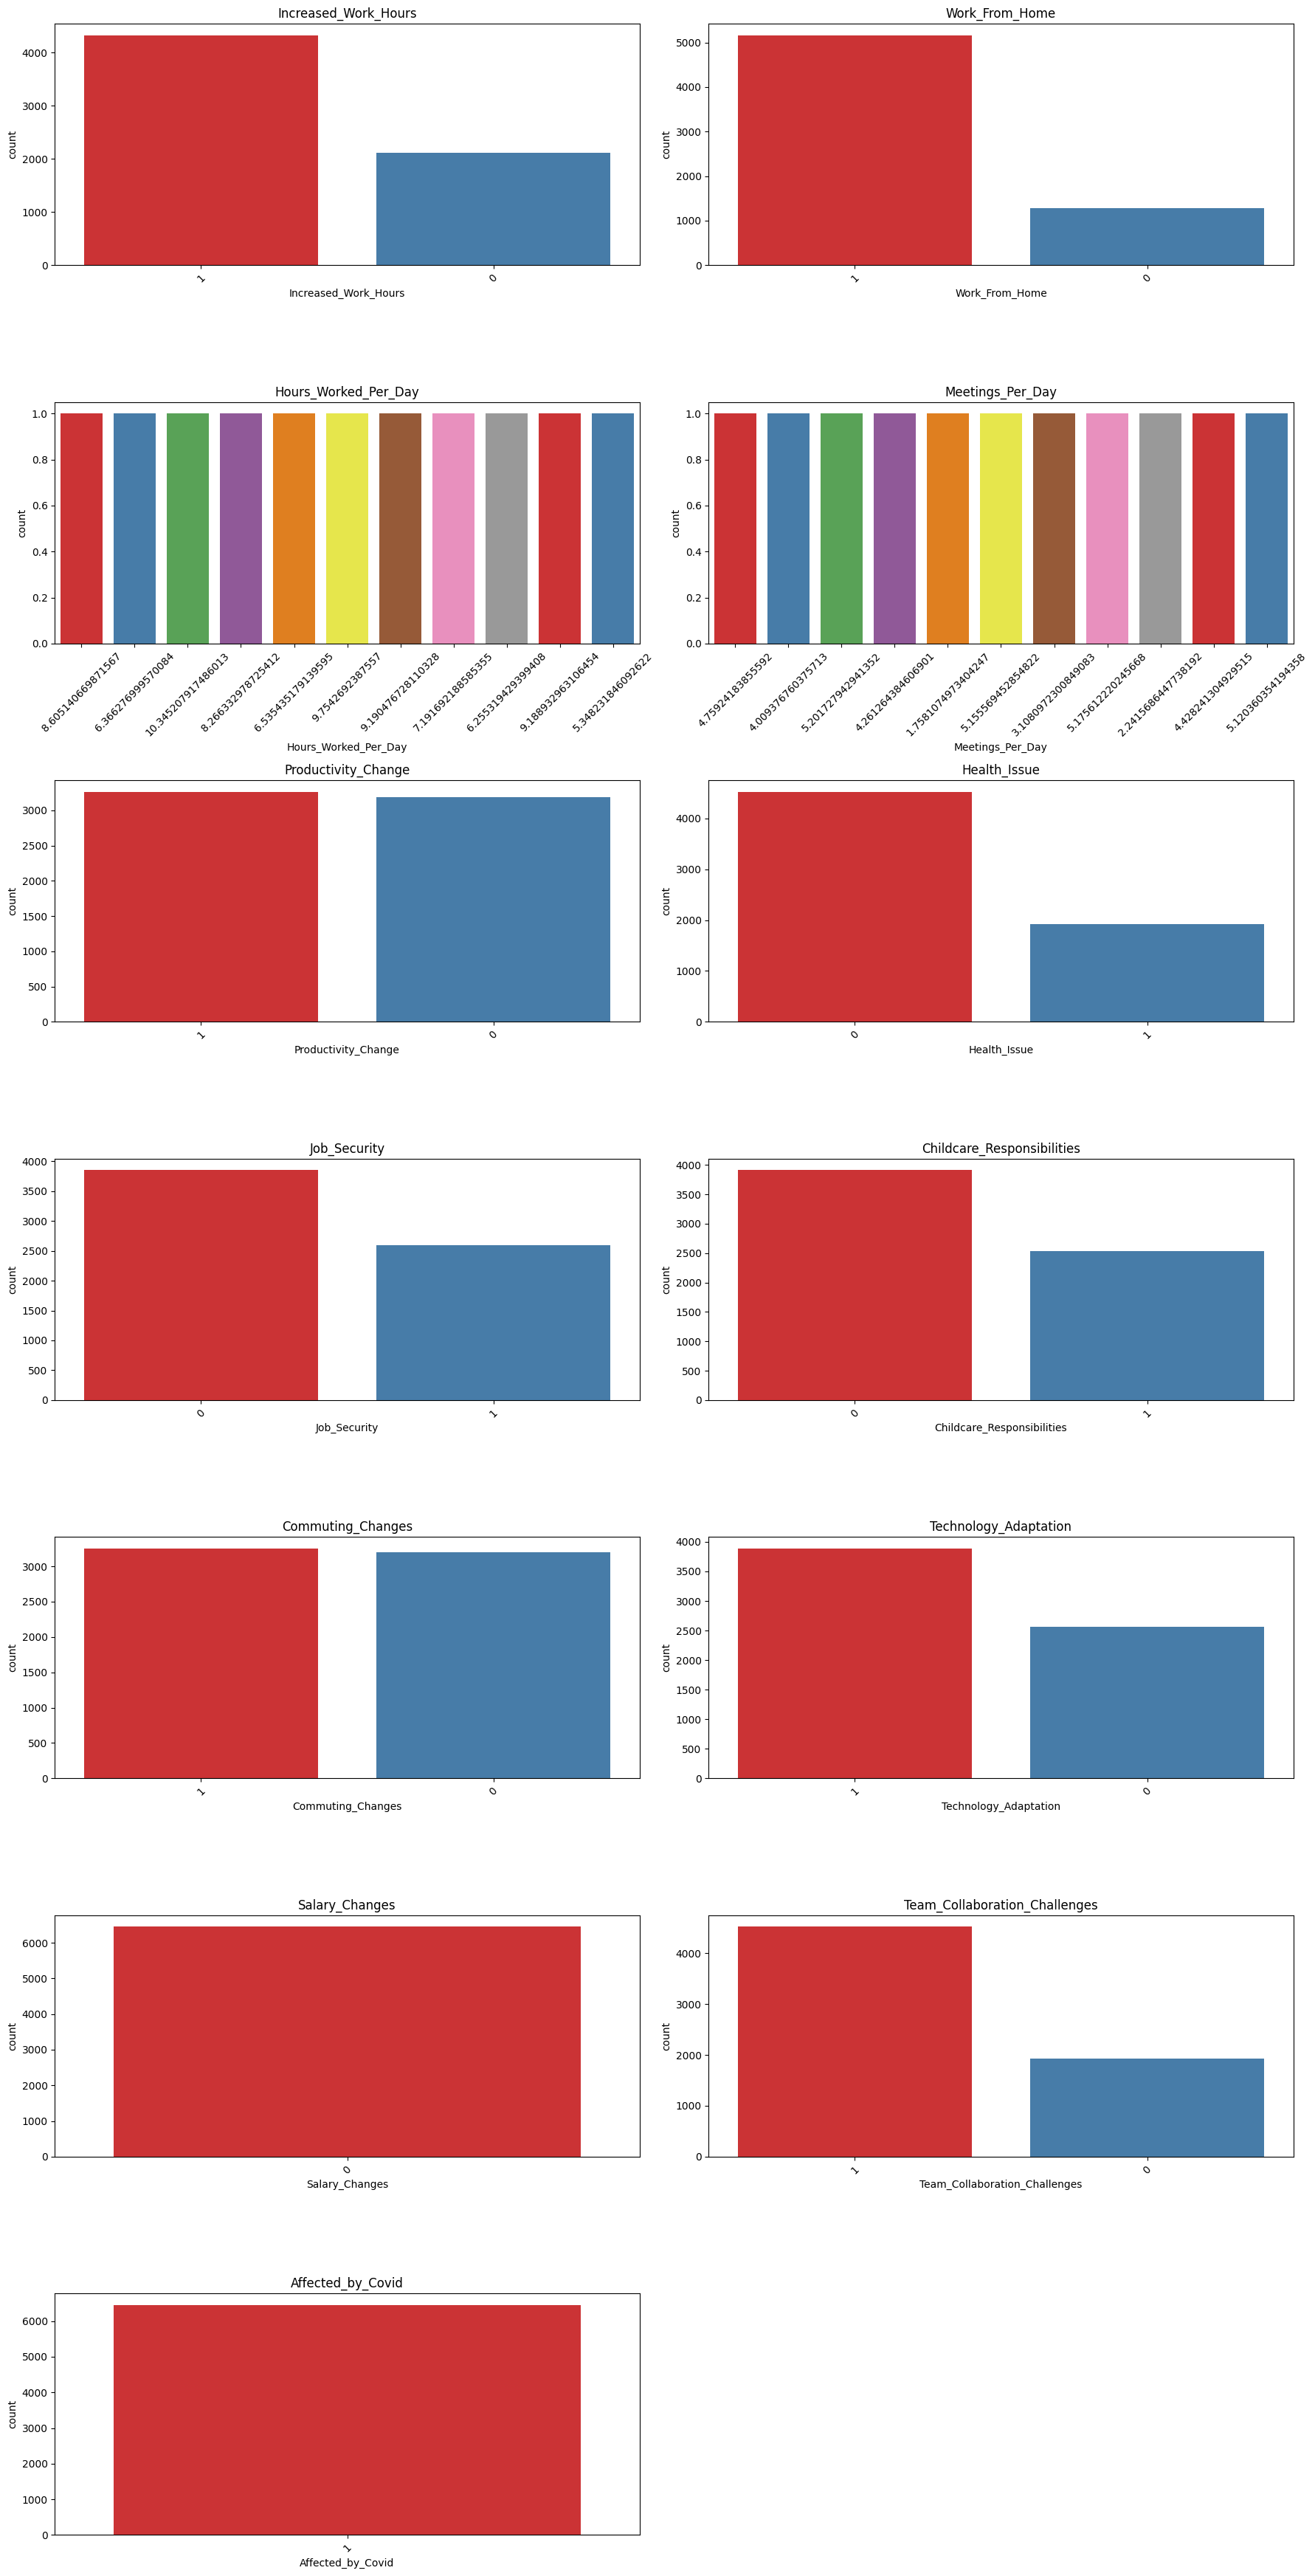

In [25]:
color_palette = sns.color_palette("Set1", len(numerical_col))

n_cols = 2
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data_class0[column].value_counts().nlargest(11).index
    
    filtered_data_class0 = data_class0[data_class0[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data_class0, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()

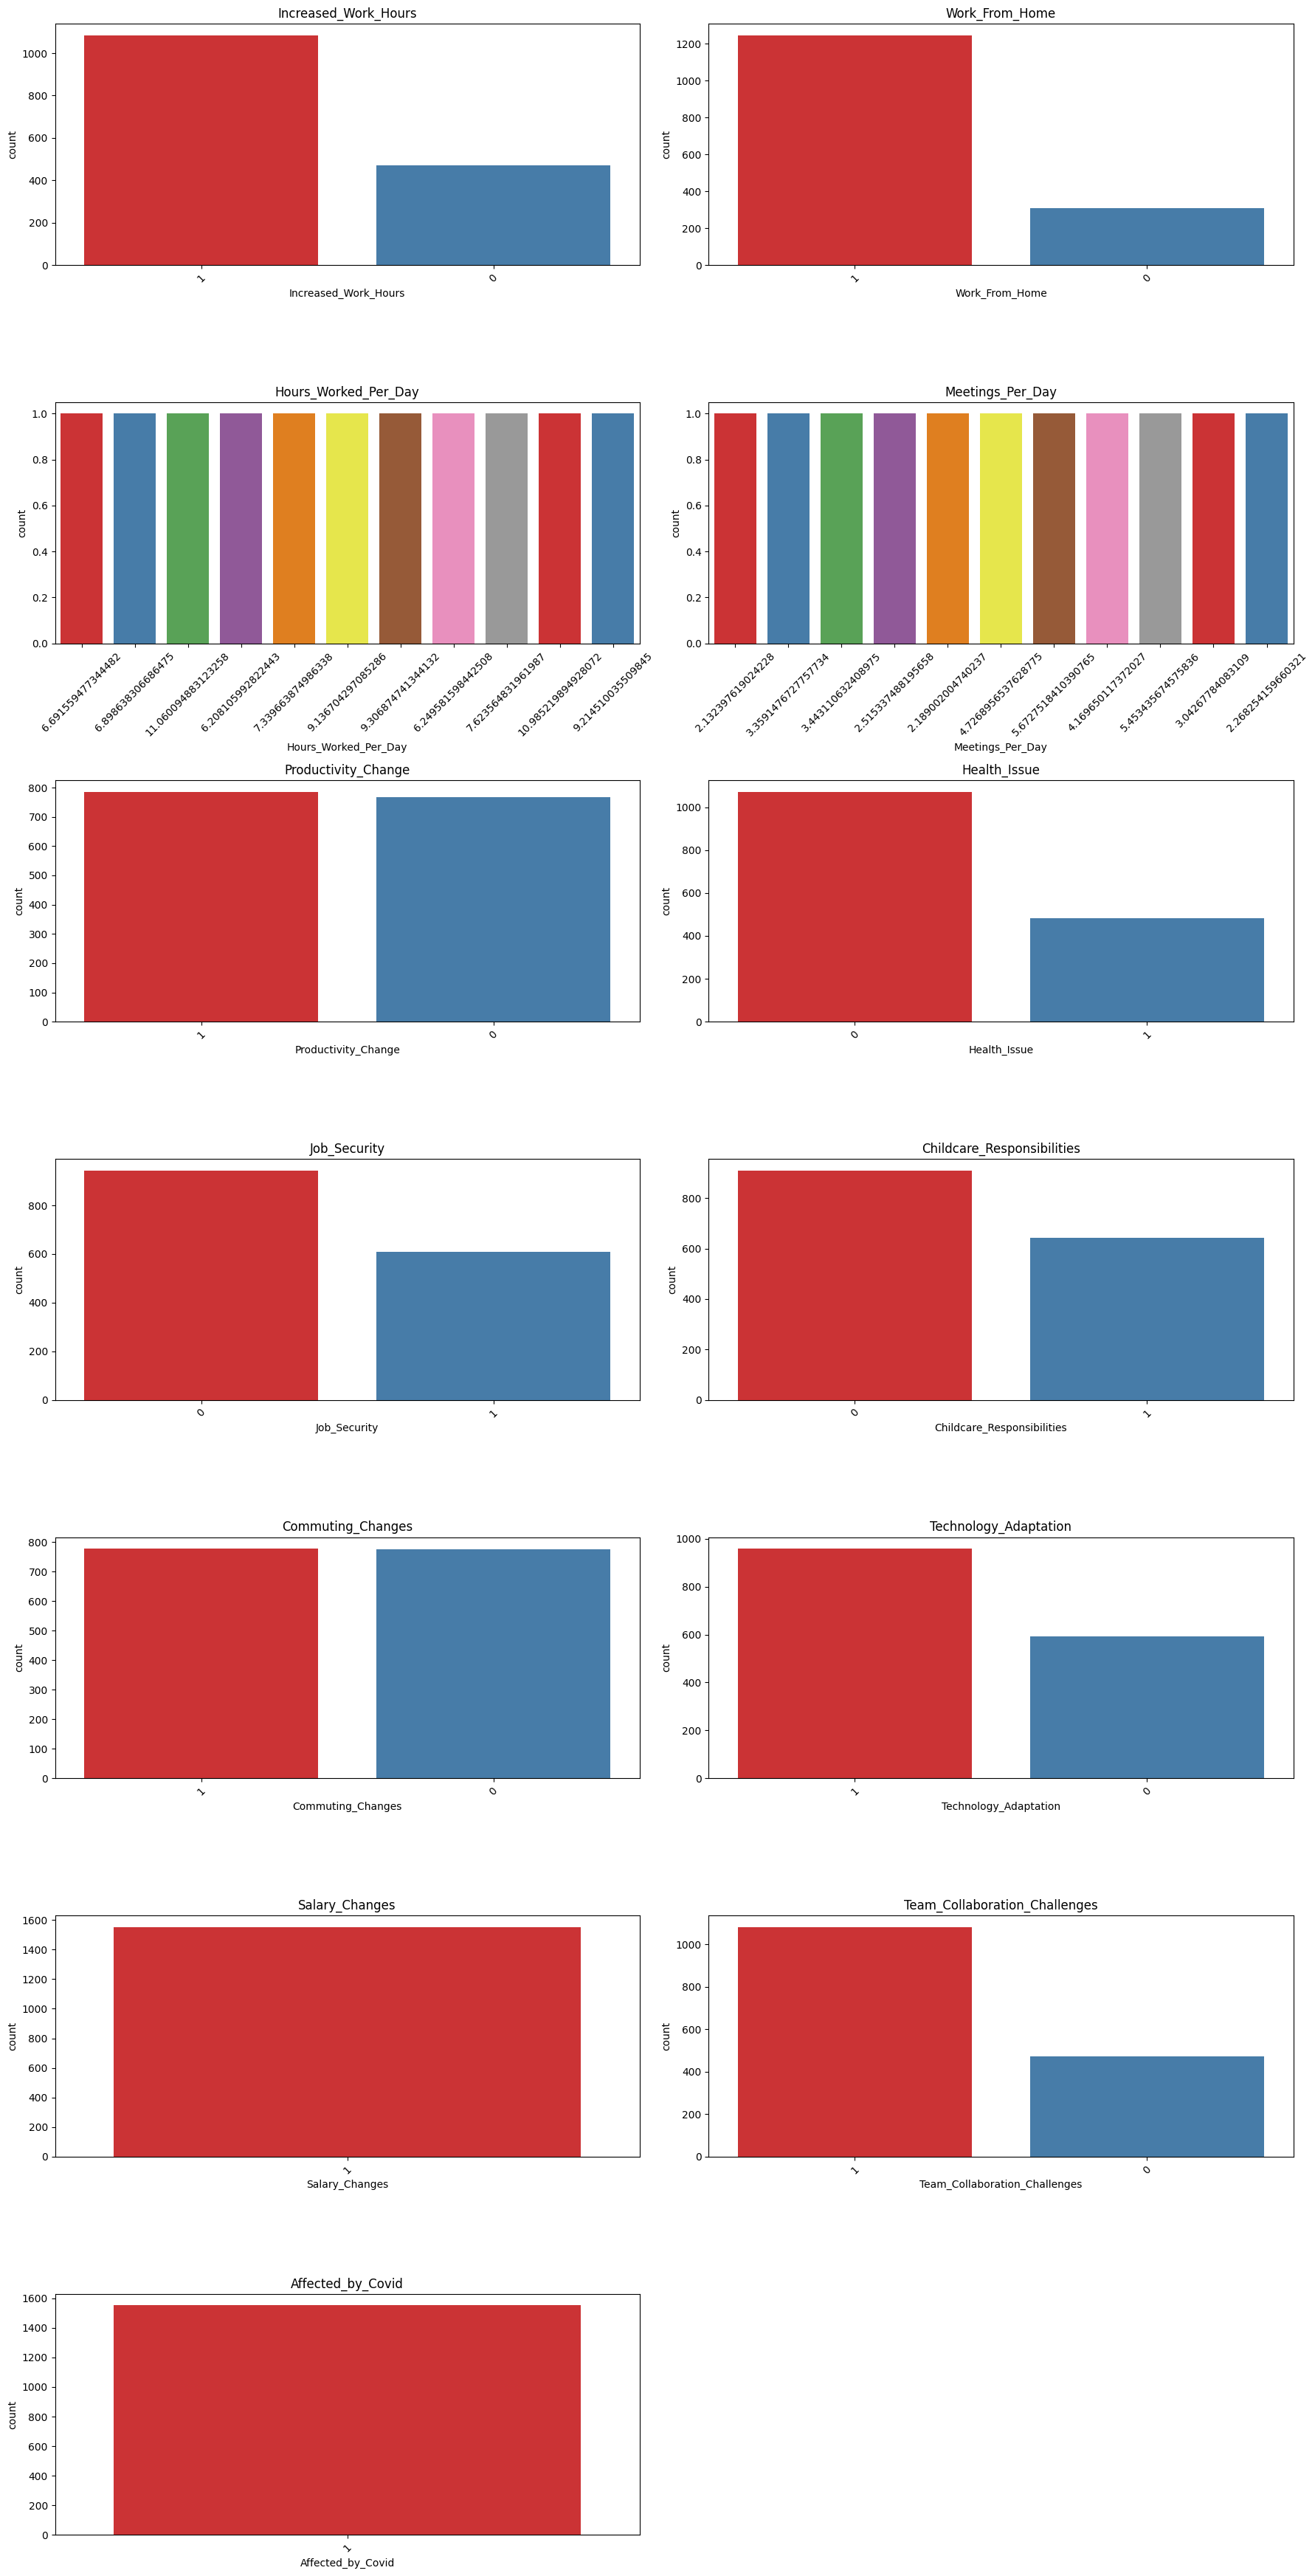

In [26]:
color_palette = sns.color_palette("Set1", len(numerical_col))

n_cols = 2
n_rows = (len(numerical_col) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = data_class1[column].value_counts().nlargest(11).index
    
    filtered_data_class1 = data_class1[data_class1[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_data_class1, x=column, palette=color_palette, order=top_10_items)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()

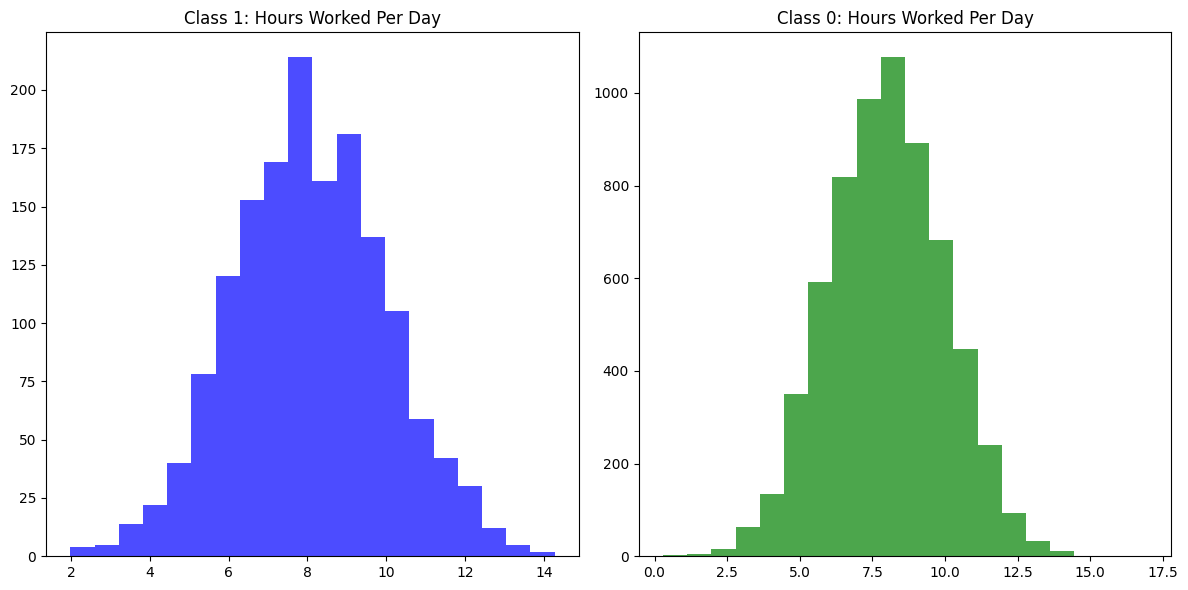

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(data_class1['Hours_Worked_Per_Day'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Class 1: Hours Worked Per Day')

axes[1].hist(data_class0['Hours_Worked_Per_Day'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Class 0: Hours Worked Per Day')
plt.tight_layout()
plt.show()

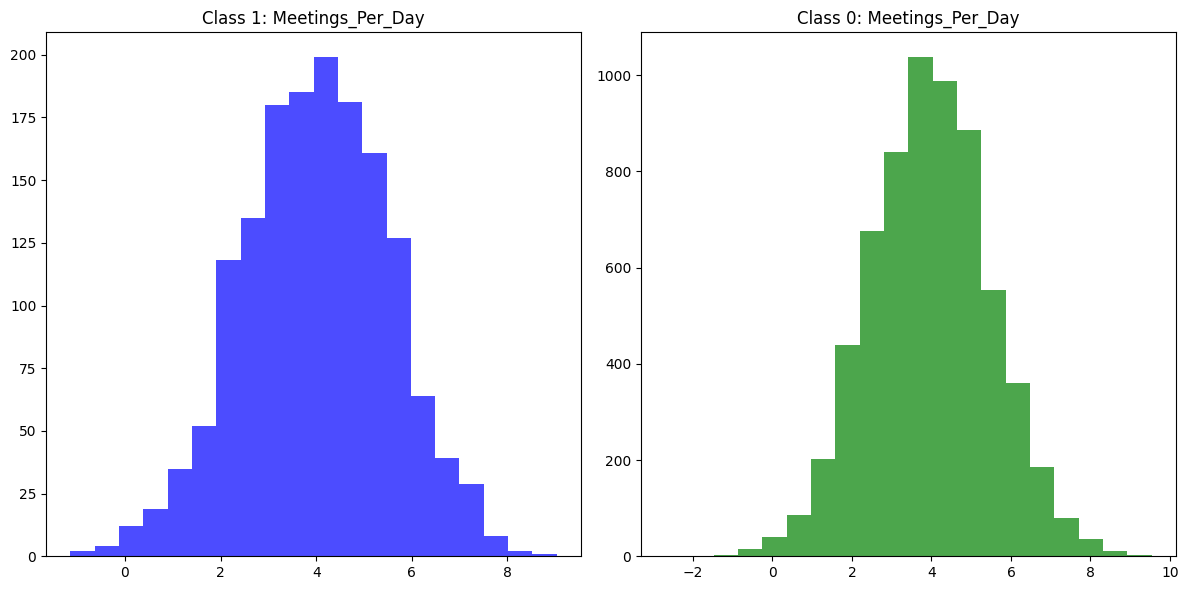

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(data_class1['Meetings_Per_Day'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Class 1: Meetings_Per_Day')

axes[1].hist(data_class0['Meetings_Per_Day'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Class 0: Meetings_Per_Day')
plt.tight_layout()
plt.show()

# corr

In [30]:
label_encoders = {}

df_label = data.copy()
for col in df_label.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col].astype(str))
    label_encoders[col] = le

In [31]:
corr_matrix = df_label.corr()
corr_matrix[TARGET].sort_values(ascending=False)

Salary_Changes                   1.000000
Increased_Work_Hours             0.022818
Childcare_Responsibilities       0.016459
Hours_Worked_Per_Day             0.014981
Meetings_Per_Day                 0.011949
Technology_Adaptation            0.011815
Health_Issue                     0.009888
Stress_Level                     0.003523
Work_From_Home                   0.001442
Productivity_Change             -0.000272
Commuting_Changes               -0.002733
Team_Collaboration_Challenges   -0.003786
Job_Security                    -0.008619
Sector                          -0.009036
Affected_by_Covid                     NaN
Name: Salary_Changes, dtype: float64

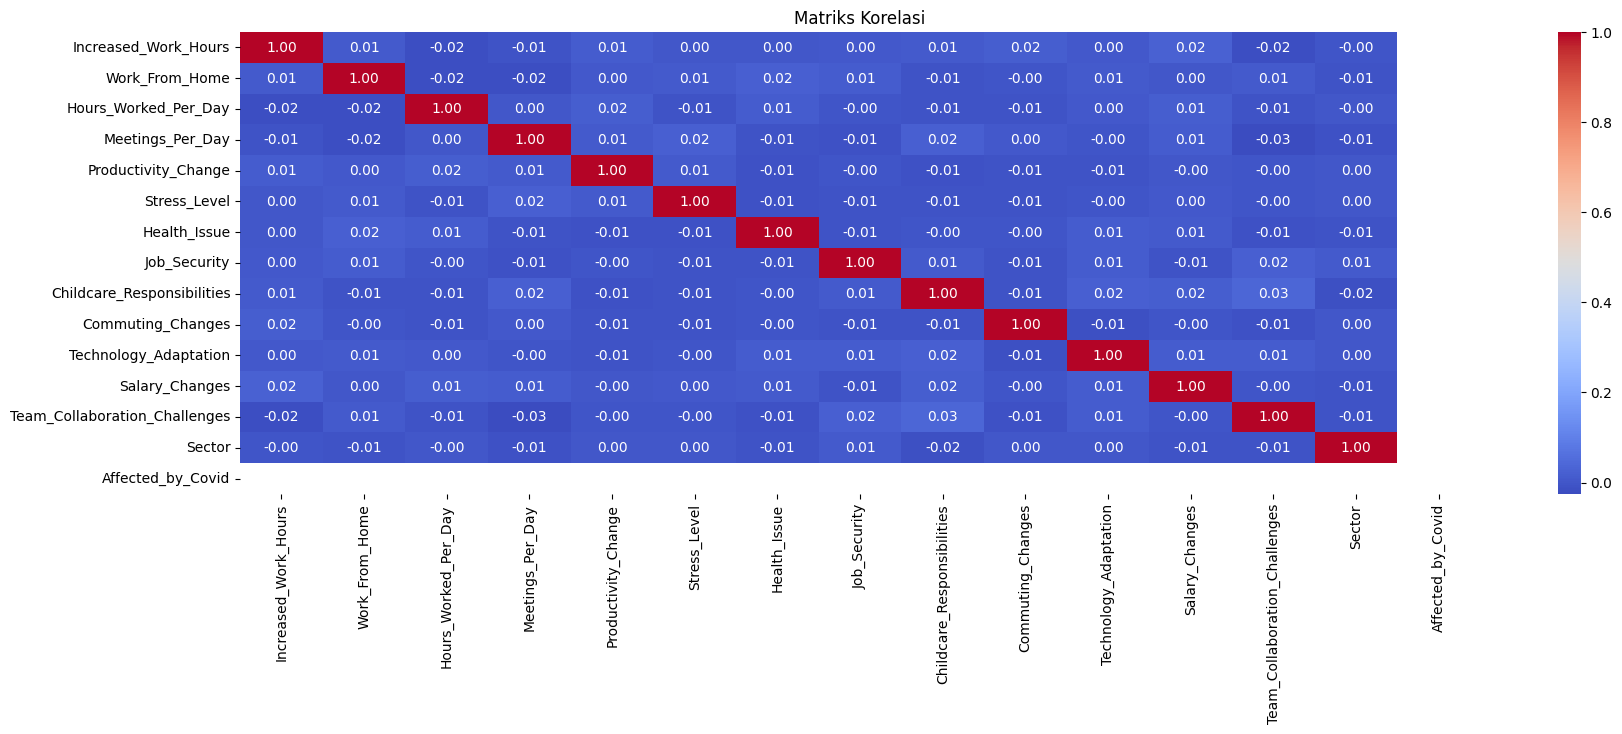

In [32]:
# Membuat heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df_label.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Menambahkan judul
plt.title('Matriks Korelasi')

# Menampilkan plot
plt.show()

# model

In [33]:
train = data.copy()

In [34]:
X = train.drop(columns=[TARGET, 'Affected_by_Covid'])
y = train[[TARGET]]

In [35]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

In [36]:
random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

classifiers = []

classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error'))
classifiers.append(CatBoostClassifier(random_state=random_state, verbose=False))

classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state=random_state))

In [37]:
def model_cv(classifiers,X_train, y_train):
    cv_results_accuracy = []
    cv_results_f1_micro = []
    for classifier in classifiers:
        cv_results_accuracy.append(cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=kfold, n_jobs=4))

    # Menghitung rata-rata dan standar deviasi
    cv_means_accuracy = [result.mean() for result in cv_results_accuracy]
    cv_std_accuracy = [result.std() for result in cv_results_accuracy]


    # Membuat DataFrame untuk hasil
    cv_res = pd.DataFrame({
        "CrossValMeans Accuracy": cv_means_accuracy,
        "CrossValErrors Accuracy": cv_std_accuracy,
        "Algorithm": ["DecisionTreeClassifier",'Random Forest','XGBoost','CatBoost','Gradient Boosting', 'AdaBoost', 'Bagging', 'Extra Trees','LightGBM']
    })

    # Mengurutkan hasil berdasarkan CrossValMeans Accuracy
    cv_res_sorted = cv_res.sort_values(by='CrossValMeans Accuracy', ascending=False)


    return cv_res_sorted

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
model_cv(classifiers, X_train, y_train)

,CrossValMeans Accuracy,CrossValErrors Accuracy,Algorithm
5,0.804464,0.000565,AdaBoost
3,0.803571,0.001263,CatBoost
4,0.803393,0.001536,Gradient Boosting
1,0.800893,0.003244,Random Forest
8,0.798036,0.003164,LightGBM
6,0.787679,0.003589,Bagging
2,0.778036,0.005830,XGBoost
7,0.766964,0.004825,Extra Trees
0,0.664286,0.010744,DecisionTreeClassifier


In [40]:
test_set = []

for model in classifiers:
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_test)
    model_name = type(model).__name__
    

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    test_set.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

df_results = pd.DataFrame(test_set)
df_results.sort_values('F1 Score', ascending=False)

[LightGBM] [Info] Number of positive: 1087, number of negative: 4513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194107 -> initscore=-1.423541
[LightGBM] [Info] Start training from score -1.423541


,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTreeClassifier,0.672917,0.191555,0.184158,0.199571
7,ExtraTreesClassifier,0.761667,0.092063,0.176829,0.062232
2,XGBClassifier,0.783333,0.061372,0.193182,0.036481
6,BaggingClassifier,0.787500,0.030418,0.133333,0.017167
8,LGBMClassifier,0.802500,0.008368,0.166667,0.004292
1,RandomForestClassifier,0.800417,0.004158,0.066667,0.002146
3,CatBoostClassifier,0.804583,0.000000,0.000000,0.000000
4,GradientBoostingClassifier,0.805417,0.000000,0.000000,0.000000
5,AdaBoostClassifier,0.805417,0.000000,0.000000,0.000000


# see the data distribution:

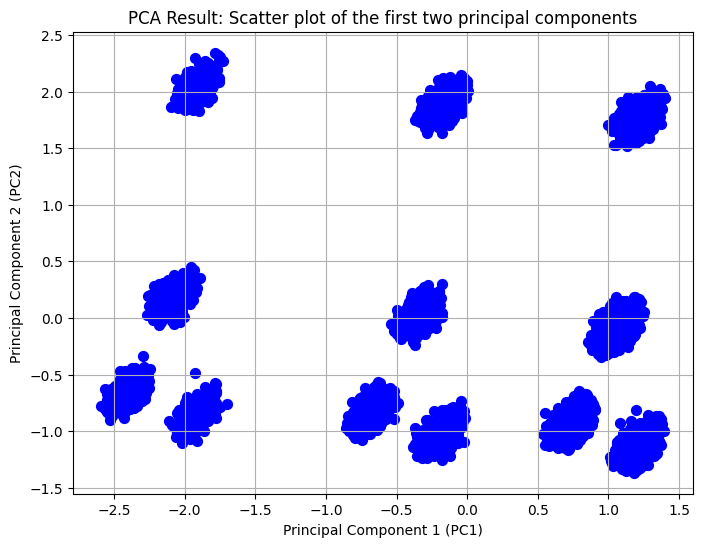

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['label'] = y
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.title('PCA Result: Scatter plot of the first two principal components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

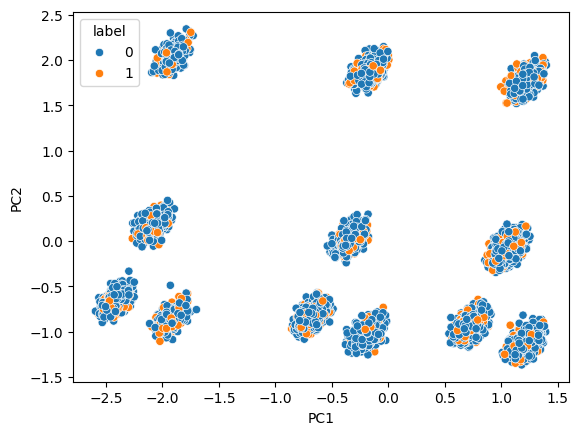

In [42]:
sns.scatterplot(data=df_pca, x= "PC1", y = "PC2", hue='label')

# Tackling Imbalanced with Oversampling (upsampling)

## Random Oversamplinng

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [45]:
model_cv(classifiers, X_resampled, y_resampled)

,CrossValMeans Accuracy,CrossValErrors Accuracy,Algorithm
1,0.951252,0.003672,Random Forest
7,0.942389,0.002593,Extra Trees
6,0.924995,0.007212,Bagging
0,0.869377,0.003413,DecisionTreeClassifier
2,0.838357,0.007499,XGBoost
3,0.789054,0.013563,CatBoost
8,0.773210,0.011820,LightGBM
4,0.629737,0.013854,Gradient Boosting
5,0.550411,0.010859,AdaBoost


In [46]:
oversample_result = []

for model in classifiers:
    model.fit(X_resampled, y_resampled)   
    y_pred = model.predict(X_test)
    model_name = type(model).__name__
    

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    oversample_result.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

df_results = pd.DataFrame(oversample_result)
df_results.sort_values('F1 Score', ascending=False)

[LightGBM] [Info] Number of positive: 4513, number of negative: 4513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 9026, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Accuracy,F1 Score,Precision,Recall
4,GradientBoostingClassifier,0.568333,0.277545,0.205579,0.427039
5,AdaBoostClassifier,0.542083,0.254915,0.186323,0.403433
0,DecisionTreeClassifier,0.706250,0.229508,0.233853,0.225322
8,LGBMClassifier,0.645833,0.224453,0.195238,0.263948
3,CatBoostClassifier,0.653750,0.187683,0.172352,0.206009
2,XGBClassifier,0.675417,0.173913,0.171908,0.175966
6,BaggingClassifier,0.771250,0.104405,0.217687,0.068670
7,ExtraTreesClassifier,0.757500,0.093458,0.170455,0.064378
1,RandomForestClassifier,0.780833,0.070671,0.200000,0.042918


## Generate synthetic examples
Using SMOTE (sintetic minority Over Sampling)

In [47]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [48]:
model_cv(classifiers, X_smote, y_smote)

,CrossValMeans Accuracy,CrossValErrors Accuracy,Algorithm
1,0.826279,0.011314,Random Forest
7,0.802903,0.005936,Extra Trees
6,0.773874,0.005684,Bagging
3,0.724684,0.007366,CatBoost
8,0.719698,0.012181,LightGBM
2,0.716486,0.008209,XGBoost
0,0.704963,0.006572,DecisionTreeClassifier
4,0.631177,0.010353,Gradient Boosting
5,0.598492,0.007200,AdaBoost


In [49]:
test_set_Smote = []

for model in classifiers:
    model.fit(X_smote, y_smote)   
    y_pred_smote = model.predict(X_test)
    model_name = type(model).__name__
    

    accuracy = accuracy_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    
    test_set_Smote.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

df_results_smote = pd.DataFrame(test_set_Smote)
df_results_smote.sort_values('F1 Score', ascending=False)

[LightGBM] [Info] Number of positive: 4513, number of negative: 4513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 9026, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Accuracy,F1 Score,Precision,Recall
5,AdaBoostClassifier,0.556250,0.287625,0.208941,0.461373
4,GradientBoostingClassifier,0.595833,0.269578,0.207657,0.384120
2,XGBClassifier,0.635417,0.254049,0.210750,0.319742
8,LGBMClassifier,0.638750,0.251941,0.210678,0.313305
0,DecisionTreeClassifier,0.611667,0.243506,0.195822,0.321888
3,CatBoostClassifier,0.630000,0.229167,0.192420,0.283262
7,ExtraTreesClassifier,0.682500,0.212810,0.205179,0.221030
6,BaggingClassifier,0.695000,0.192053,0.197727,0.186695
1,RandomForestClassifier,0.702083,0.179104,0.192593,0.167382


# Undersampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


rus = RandomUnderSampler(random_state=42)
X_res_under, y_res_under = rus.fit_resample(X_train, y_train)

print(f"Distribusi kelas setelah undersampling: {Counter(y_res_under)}")

Distribusi kelas setelah undersampling: Counter({'Salary_Changes': 1})


In [51]:
model_cv(classifiers, X_res_under, y_res_under)

,CrossValMeans Accuracy,CrossValErrors Accuracy,Algorithm
7,0.534034,0.009055,Extra Trees
1,0.521156,0.006640,Random Forest
5,0.518857,0.024561,AdaBoost
8,0.515175,0.021740,LightGBM
2,0.514707,0.017187,XGBoost
3,0.511497,0.004928,CatBoost
4,0.498616,0.014218,Gradient Boosting
6,0.492642,0.015853,Bagging
0,0.486676,0.019024,DecisionTreeClassifier


In [52]:
test_set_under = []

for model in classifiers:
    model.fit(X_res_under, y_res_under)   
    y_pred_smote = model.predict(X_test)
    model_name = type(model).__name__
    

    accuracy = accuracy_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    
    test_set_under.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

df_results_smote = pd.DataFrame(test_set_under)
df_results_smote.sort_values('F1 Score', ascending=False)

[LightGBM] [Info] Number of positive: 1087, number of negative: 1087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 2174, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Accuracy,F1 Score,Precision,Recall
5,AdaBoostClassifier,0.501667,0.297297,0.204693,0.542918
7,ExtraTreesClassifier,0.527917,0.294081,0.207199,0.506438
2,XGBClassifier,0.504167,0.286571,0.198835,0.512876
8,LGBMClassifier,0.496667,0.286052,0.197390,0.519313
0,DecisionTreeClassifier,0.492917,0.278601,0.192465,0.504292
4,GradientBoostingClassifier,0.506667,0.278049,0.194208,0.489270
3,CatBoostClassifier,0.502083,0.274438,0.191363,0.484979
6,BaggingClassifier,0.547500,0.273092,0.198444,0.437768
1,RandomForestClassifier,0.492917,0.268190,0.186299,0.478541


## Tomek links

In [53]:
from imblearn.under_sampling import TomekLinks

In [54]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)

In [55]:
model_cv(classifiers,X_res, y_res)

,CrossValMeans Accuracy,CrossValErrors Accuracy,Algorithm
1,0.789545,0.002779,Random Forest
5,0.788771,0.000724,AdaBoost
3,0.788383,0.002495,CatBoost
4,0.787803,0.001877,Gradient Boosting
8,0.783349,0.001877,LightGBM
6,0.774250,0.004215,Bagging
7,0.773669,0.007921,Extra Trees
2,0.762246,0.002258,XGBoost
0,0.652856,0.008927,DecisionTreeClassifier


In [56]:
tomekL = []

for model in classifiers:
    model.fit(X_res, y_res)   
    y_pred_tomek = model.predict(X_test)
    model_name = type(model).__name__
    

    accuracy = accuracy_score(y_test, y_pred_tomek)
    f1 = f1_score(y_test, y_pred_tomek)
    precision = precision_score(y_test, y_pred_tomek)
    recall = recall_score(y_test, y_pred_tomek)
    
    tomekL.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

df_results_smote = pd.DataFrame(tomekL)
df_results_smote.sort_values('F1 Score', ascending=False)

[LightGBM] [Info] Number of positive: 1087, number of negative: 4078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 5165, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210455 -> initscore=-1.322185
[LightGBM] [Info] Start training from score -1.322185


,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTreeClassifier,0.661667,0.225191,0.202749,0.253219
7,ExtraTreesClassifier,0.742500,0.122159,0.180672,0.092275
2,XGBClassifier,0.771250,0.089552,0.197080,0.057940
6,BaggingClassifier,0.782917,0.051002,0.168675,0.030043
1,RandomForestClassifier,0.795000,0.019920,0.138889,0.010730
4,GradientBoostingClassifier,0.804583,0.008457,0.285714,0.004292
8,LGBMClassifier,0.797083,0.008147,0.080000,0.004292
3,CatBoostClassifier,0.805417,0.000000,0.000000,0.000000
5,AdaBoostClassifier,0.805000,0.000000,0.000000,0.000000


# Ensemble method

In [57]:
def train_and_evaluate_voting(X, y, type_voting, Models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    voting_model = VotingClassifier(estimators=Models, voting= type_voting )

    voting_model.fit(X_train, y_train)


    y_pred = voting_model.predict(X_test)
  
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    proportion = pd.Series(y_pred).value_counts()
    print(proportion)
    
    hasil = {
        "Accuracy":accuracy,
        "f1":f1,
        "precision":precision,
        "recall":recall
    }
    
    
    return hasil, voting_model

In [58]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state=42)
cat_boost = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose = False)
ada_model = AdaBoostClassifier(random_state=42)
bagging_model = BaggingClassifier(random_state=42)

Estimator_tree = [    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gb', gb_model),
    ('cat', cat_boost),
    ('ada', ada_model),
    ('bagging', bagging_model)]

In [59]:
accuracy_hard, model_hard = train_and_evaluate_voting(X, y, "hard", Estimator_tree ) 
model_hard

0    1600
Name: count, dtype: int64


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_typ...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001E61D03E510>),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('bagging', BaggingClassifier(random_state=42))])

In [60]:
accuracy_hard

{'Accuracy': 0.805625, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

In [61]:
accuracy_soft, model_soft = train_and_evaluate_voting(X, y, "soft", Estimator_tree ) 
model_soft

0    1599
1       1
Name: count, dtype: int64


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_typ...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001E61D03E510>),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('bagging', BaggingClassifier(random_state=42))],
                 voting='soft')

# submit

In [72]:
test = pd.read_csv('data/test.csv')

In [73]:
test = pd.get_dummies(test, columns=test.select_dtypes(include=['object']).columns, drop_first=True)

In [74]:
test.drop(columns=['id', 'Affected_by_Covid'], inplace=True)

In [94]:
ada = BaggingClassifier()
ada.fit(X_smote, y_smote)

BaggingClassifier()

In [95]:
ada.predict(test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
for clf in classifiers:
    ada = clf
    ada.fit(X_smote, y_smote)
    
    print(type(clf).__name__)
    print(pd.Series(data=ada.predict(test)).value_counts())

DecisionTreeClassifier
0    1383
1     617
Name: count, dtype: int64
RandomForestClassifier
0    1665
1     335
Name: count, dtype: int64
XGBClassifier
0    1435
1     565
Name: count, dtype: int64
CatBoostClassifier
0    1423
1     577
Name: count, dtype: int64
GradientBoostingClassifier
0    1266
1     734
Name: count, dtype: int64
AdaBoostClassifier
0    1169
1     831
Name: count, dtype: int64
BaggingClassifier
0    1655
1     345
Name: count, dtype: int64
ExtraTreesClassifier
0    1615
1     385
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 4513, number of negative: 4513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 9026, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

In [96]:
submit = pd.read_csv("data/sample_submission.csv")

In [98]:
submit['Salary_Changes'] = ada.predict(test)

In [99]:
submit['Salary_Changes'].value_counts()

Salary_Changes
0    1623
1     377
Name: count, dtype: int64

In [100]:
submit

,id,Salary_Changes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1995,1995,0
1996,1996,0
1997,1997,0
1998,1998,0


In [101]:
submit.to_csv('dataSubmit/baggingclf_Smote.csv', index=False)